In [1]:
import cv2
import numpy as np
import imutils
import pytesseract
from pytesseract import image_to_string
from PIL import Image
import pytesseract
import argparse
import cv2
import os
import matplotlib.pyplot as plt
cv2.__version__
##working on 4,2.0

'4.2.0'

## Image processing


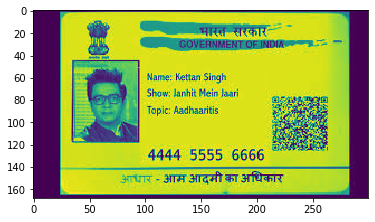

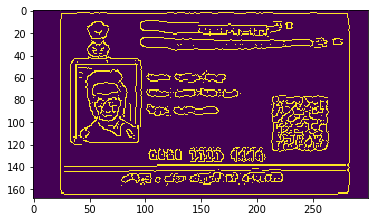

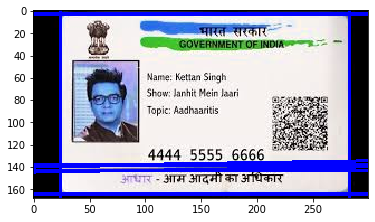

In [2]:
img = cv2.imread("images/1.jpg")

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
plt.show()
kernel = np.ones((5,5),np.float32)/25
gray = cv2.filter2D(gray,-1,kernel)
edges = cv2.Canny(gray,400,600,apertureSize = 5)
cv2.imshow('image',edges)
cv2.imwrite("image1.png",edges)
plt.imshow(edges)
plt.show()
cv2.waitKey(0)

lines = cv2.HoughLines(edges,1,np.pi/180,15)
for i in range(8):
    for rho,theta in lines[i]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))
    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)

cv2.imshow('image',img)
cv2.imwrite('image2.png',img)
plt.imshow(img)
plt.show()
cv2.waitKey(0)

cv2.destroyAllWindows()

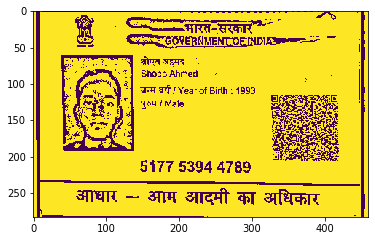

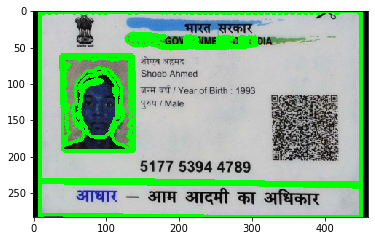

l [[9, 0], [9, 282]]
r [[450, 282], [450, 0]]
lu [9, 0]
ld [9, 282]
ru [450, 0]
rd [450, 282]
lu_ [9.0, 0.0]
ld_ [9.0, 282.0]
ru_ [450.0, 0.0]
rd_ [450.0, 282.0]
H[[ 1.00000000e+00  0.00000000e+00 -4.92278448e-14]
 [ 0.00000000e+00  1.00000000e+00 -7.38417672e-14]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]


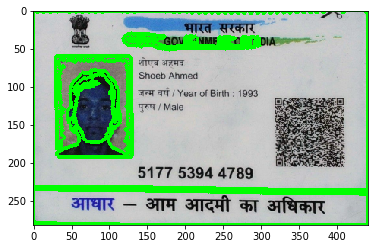

In [3]:
document_img = cv2.imread("images/2.jpeg")
document_img = imutils.resize(document_img, width=460)

src = imutils.resize(document_img, width=460)
gray = cv2.cvtColor(document_img,cv2.COLOR_BGR2GRAY)

# document_type = document_types.ID_front.value
equ = cv2.medianBlur(gray, 1)

fil = cv2.bilateralFilter(equ, 9, 11, 17)

thresh = cv2.adaptiveThreshold(fil, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, \
                           cv2.THRESH_BINARY, 11, 2)

cv2.imshow('canny', thresh)
plt.imshow(thresh)
plt.show()
cv2.waitKey(0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnts = sorted(contours, key=cv2.contourArea, reverse=True)[:5]
screenCnt = None
# loop over our contours
for c in cnts:
    # approximate the contour
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.015 * peri, True)

    # if our approximated contour has four points, then
    # we can assume that we have found our screen
    if len(approx) == 4:
        screenCnt = approx
        break

cv2.drawContours(src, cnts, -1, (0, 255, 0), 3)
cv2.imshow('contours', src)
plt.imshow(src)
plt.show()
cv2.waitKey(0)

# cv2.drawContours(im, appr, -1, (0,255,0), 3)
points_list = [[i[0][0], i[0][1]] for i in screenCnt]

left = sorted(points_list, key=lambda p: p[0])[0:2]
right = sorted(points_list, key=lambda p: p[0])[2:4]

print("l " + str(left))
print("r " + str(right))

lu = sorted(left, key=lambda p: p[1])[0]
ld = sorted(left, key=lambda p: p[1])[1]

ru = sorted(right, key=lambda p: p[1])[0]
rd = sorted(right, key=lambda p: p[1])[1]

print("lu " + str(lu))
print("ld " + str(ld))
print("ru " + str(ru))
print("rd " + str(rd))

lu_ = [(lu[0] + ld[0]) / 2, (lu[1] + ru[1]) / 2]
ld_ = [(lu[0] + ld[0]) / 2, (ld[1] + rd[1]) / 2]
ru_ = [(ru[0] + rd[0]) / 2, (lu[1] + ru[1]) / 2]
rd_ = [(ru[0] + rd[0]) / 2, (ld[1] + rd[1]) / 2]

print("lu_ " + str(lu_))
print("ld_ " + str(ld_))
print("ru_ " + str(ru_))
print("rd_ " + str(rd_))

src_pts = np.float32(np.array([lu, ru, rd, ld]))
dst_pts = np.float32(np.array([lu_, ru_, rd_, ld_]))

h, w, b = src.shape
H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

print("H" + str(H))

imw = cv2.warpPerspective(src, H, (w, h))
im =  imw[int(lu_[1]):int(rd_[1]), int(lu_[0]):int(rd_[0])]  # cropping image

cv2.imshow('ff', im)
plt.imshow(im)
plt.show()
cv2.waitKey(0)


cv2.destroyAllWindows()

## ocr

In [4]:
# image = cv2.imread("1.png")
# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# #"thresh"
# gray = cv2.threshold(gray, 0, 255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
# # make a check to see if median blurring should be done to remove
# # noise
# # write the grayscale image to disk as a temporary file so we can
# # apply OCR to it
# filename = "{}.png".format(os.getpid())
# plt.imshow(gray)
# plt.show()
# cv2.imwrite(filename, gray)

In [5]:
# #blur
# gray = cv2.medianBlur(gray, 3)
# # write the grayscale image to disk as a temporary file so we can
# # apply OCR to it
# filename = "{}.png".format(os.getpid())
# cv2.imwrite(filename, gray)
# plt.imshow(gray)
# plt.show()

In [6]:
image = cv2.imread("images/image2.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
text = pytesseract.image_to_string(Image.open("images/3.jpeg"))
# os.remove(filename)
print(text)
# show the output images
cv2.imshow("Image", image)
cv2.waitKey(0)
cv2.imshow("Output", gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

- ae RTT
z ~—GOVERNMENTOF INDIA
Rega usrys
Mehboob Rajput

_ sa fay DOB: 23/03/1981
Tey / MALE

  

3900 5130 7206
A aranz, At TEA


In [7]:
import re

In [8]:
print("KYC Number : "+re.search("\d{4}\s\d{4}\s\d{4}",text).group())
print("KYC Number : "+re.search("[2-9]{1}[0-9]{3}\\s[0-9]{4}\\s[0-9]{4}",text).group())

KYC Number : 3900 5130 7206
KYC Number : 3900 5130 7206
